ME200, Johannes Ruf and Luitgard Veraart

# Solutions to Assignment 10

## Exercise 40: (Central Limit Theorem)
Let $X_1, X_2, \ldots$ be a sequence of independent and identically distributed random variables having finite mean $\mu$ and finite variance $\sigma^2$. Then, for all $x \in \mathbb{R}$
\begin{align*}
\lim_{n \to \infty} \textrm{P} \left[ \frac{\frac{1}{n} \sum_{i=1}^n X_i - \mu}{\sqrt{\frac{\sigma^2}{n}}} \leq x \right] = \Phi(x) = \int_{- \infty}^x \frac{1}{\sqrt{2 \pi}} e^{- \frac{y^2}{2}} dy. 
\end{align*}



## Exercise 41: (Illustration of the Central Limit Theorem)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 
rng = np.random.default_rng(987654321)

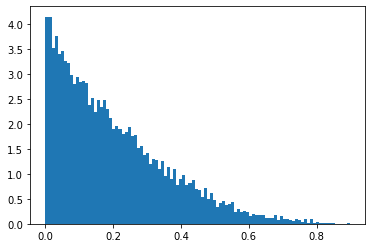

In [2]:
samplesize = 10000
sample = rng.beta(a=1, b=4, size=samplesize)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(sample, bins=100, density = True)
plt.show()
#ax.set_ylabel("density")

Next, we illustrate the CLT for the Beta distribution. To do so we consider samplesize=10000 realisations of 
$ \frac{\frac{1}{n} \sum_{i=1}^n X_i - \mu}{\sqrt{\frac{\sigma^2}{n}}}$, where $X_1, \ldots, X_n$ are i.i.d. random variables from the $Beta(a, b)$ distribution with mean $\mu=\frac{a}{a+b}$ and variance $\sigma^2 = \frac{ab}{(a+b)^2 (a+b+1)}$ for different choices of $n$. In particular, we consider $n \in \{1, 5,  15\}$ (stored in the array nsCLT below). We plot the empirical cumulative distribution functions (ECDFs) of $ \frac{\frac{1}{n} \sum_{i=1}^n X_i - \mu}{\sqrt{\frac{\sigma^2}{n}}}$ for the three different values of $n$ and compare them to the CDF of the standard Normal distribution. 

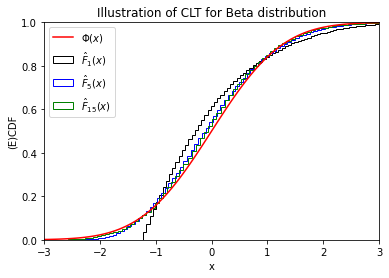

In [3]:
a = 1
b = 4
betamean = a / (a + b)
betavariance = a * b / (((a + b)**2) * (a + b + 1))

samplesize = 10000
nsCLT = np.array([1, 5, 15])
mycolours = ["black", "blue", "green"]
mylabels = ["$\hat{F}_1(x)$", "$\hat{F}_5(x)$", "$\hat{F}_{15}(x)$"]

xs = np.linspace(start=-3, stop=3, num=100)
fig, ax = plt.subplots(nrows=1, ncols=1)
for i in range(nsCLT.size):
    n = nsCLT[i]
    sample = rng.beta(a=1, b=4, size=samplesize * n)
    sample = sample.reshape(samplesize, n)
    xbar = (sample.mean(axis=1) - betamean) / np.sqrt(betavariance/n) #compute the row means axis=1
    ax.hist(xbar, bins=100, density = True, cumulative=True, histtype="step", color=mycolours[i], label = mylabels[i])
ax.set_xlim([-3, 3])
ax.set_ylim([0, 1])
ax.set_xlabel("x")
ax.set_ylabel("(E)CDF")
ax.plot(xs, norm.cdf(xs, loc=0, scale=1), color="red", label="$\Phi(x)$")
ax.set_title("Illustration of CLT for Beta distribution")
ax.legend(loc = "best")
plt.show()

Next, we repeat the analysis above, but plot the histogram/density rather than the (E)CDF. 

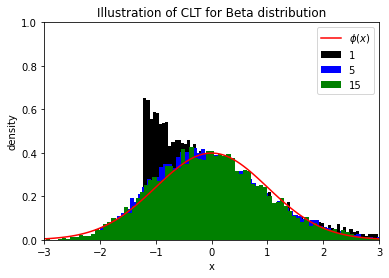

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1)
for i in range(nsCLT.size):
    n = nsCLT[i]
    sample = rng.beta(a=1, b=4, size=samplesize * n)
    sample = sample.reshape(samplesize, n)
    xbar = (sample.mean(axis=1) - betamean) / np.sqrt(betavariance/n) #compute the row means axis=1
    ax.hist(xbar, bins=100, density = True, cumulative=False, histtype="barstacked", color=mycolours[i], label = nsCLT[i])
ax.set_xlim([-3, 3])
ax.set_ylim([0, 1])
ax.set_xlabel("x")
ax.set_ylabel("density")
ax.plot(xs, norm.pdf(xs, loc=0, scale=1), color="red", label="$\phi(x)$")
ax.set_title("Illustration of CLT for Beta distribution")
ax.legend(loc = "best")
plt.show()

## Exercise 42: (Black-Scholes option pricing formula - European call option)
Let $X \sim \textrm{N}(0, 1)$. Then, 

\begin{align*}
\textrm{E}\left[ e^{-rT} (S_T - K)^+ \right] &= 
\textrm{E}\left[ e^{-rT}(S_0 \exp \left( (r - \frac{\sigma^2}{2})T + \sigma \sqrt{T} X \right) - K)^+\right]\\
&= \int_{-\infty}^{+\infty} e^{-rT} (S_0 \exp\left( (r - \frac{\sigma^2}{2})T + \sigma \sqrt{T} x\right) - K)^+ \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{x^2}{2}\right) dx=(*). 
\end{align*}

Now observe that 
\begin{align*}
S_0 \exp\left(   (r - \frac{\sigma^2}{2})T + \sigma \sqrt{T} x\right) \geq K
\Longleftrightarrow
x \geq - \frac{\log \left(\frac{S_0}{K} \right) + \left(r - \frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}}=-(D_1 - \sigma \sqrt{T})=-D_1 + \sigma \sqrt{T}. 
\end{align*}

Hence, 

\begin{align*}
(*)&= \int_{-D_1+ \sigma \sqrt{T}}^{+\infty} e^{-rT} (S_0 \exp\left( (r - \frac{\sigma^2}{2})T + \sigma \sqrt{T} x\right) - K) \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{x^2}{2}\right) dx\\
&=e^{-rT} S_0 \int_{-D_1+ \sigma \sqrt{T}}^{+\infty}  \exp\left( (r - \frac{\sigma^2}{2})T + \sigma \sqrt{T} x\right) \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{x^2}{2}\right) dx
- e^{-rT} K \int_{-D_1+ \sigma \sqrt{T}}^{+\infty}  \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{x^2}{2}\right) dx. 
\end{align*}

We now look at the two integrals separately. We start with the first one: 

\begin{align*}
&\int_{-D_1+ \sigma \sqrt{T}}^{+\infty}  \exp\left( (r - \frac{\sigma^2}{2})T + \sigma \sqrt{T} x\right) \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{x^2}{2}\right) dx\\
&= \exp\left( (r - \frac{\sigma^2}{2})T \right)
\int_{-D_1+ \sigma \sqrt{T}}^{+\infty}  \frac{1}{\sqrt{2 \pi}} \exp\left( -\frac{1}{2} \left( x^2 -2\sigma \sqrt{T} x + \sigma^2 T - \sigma^2 T \right) \right) dx\\
&=\exp\left( (r - \frac{\sigma^2}{2})T  + \frac{\sigma^2T}{2}\right)
\int_{-D_1+ \sigma \sqrt{T}}^{\infty} \frac{1}{\sqrt{2 \pi}} \exp\left( -\frac{1}{2} \left( x -\sigma \sqrt{T}) \right)^2 \right)dx\\
&=e^{rT} (1-\Phi(-D_1+\sigma \sqrt{T}-\sigma \sqrt{T}))\\
&=e^{rT} \Phi(D_1). 
\end{align*}

Next we evaluate the second integral:  
\begin{align*}
\int_{-D_1+ \sigma \sqrt{T}}^{+\infty}  \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{x^2}{2}\right) dx
=1-\Phi(-D_1 + \sigma \sqrt{T})=\Phi(D_1 - \sigma \sqrt{T}). 
\end{align*}
Combining these results, gives
\begin{align*}
\textrm{E}\left[ e^{-rT} (S_T - K)^+ \right]
=  S_0 \Phi(D_1) - K e^{-rT} \Phi(D_1 - \sigma \sqrt{T}). 
\end{align*}